In [1]:
#@title Librerias
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicHermiteSpline
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline as CHermite
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Dana Ines Romero Bustos
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

In [ ]:
# Funciones y derivadas necesarias
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
df3 = lambda x: -np.cos(x)
df6 = lambda x: -np.sin(x)

# Datos
x_num = [0, np.pi/2, np.pi]
y = f(x_num)
dy = df(x_num)
n = len(x_num)  # n = 3 puntos -> grado 2

# Error
error_lagrange = lambda x: abs(df3(x) * (x - x_num[0])*(x-x_num[1])*(x-x_num[2]) / factorial(n))
error_hermite = lambda x: abs((df6(x)/factorial(2*n)) * ((x-x_num[0]) * (x-x_num[1]) * (x-x_num[2]))**2)

error_teorico = lambda yn, y: abs(yn - y)

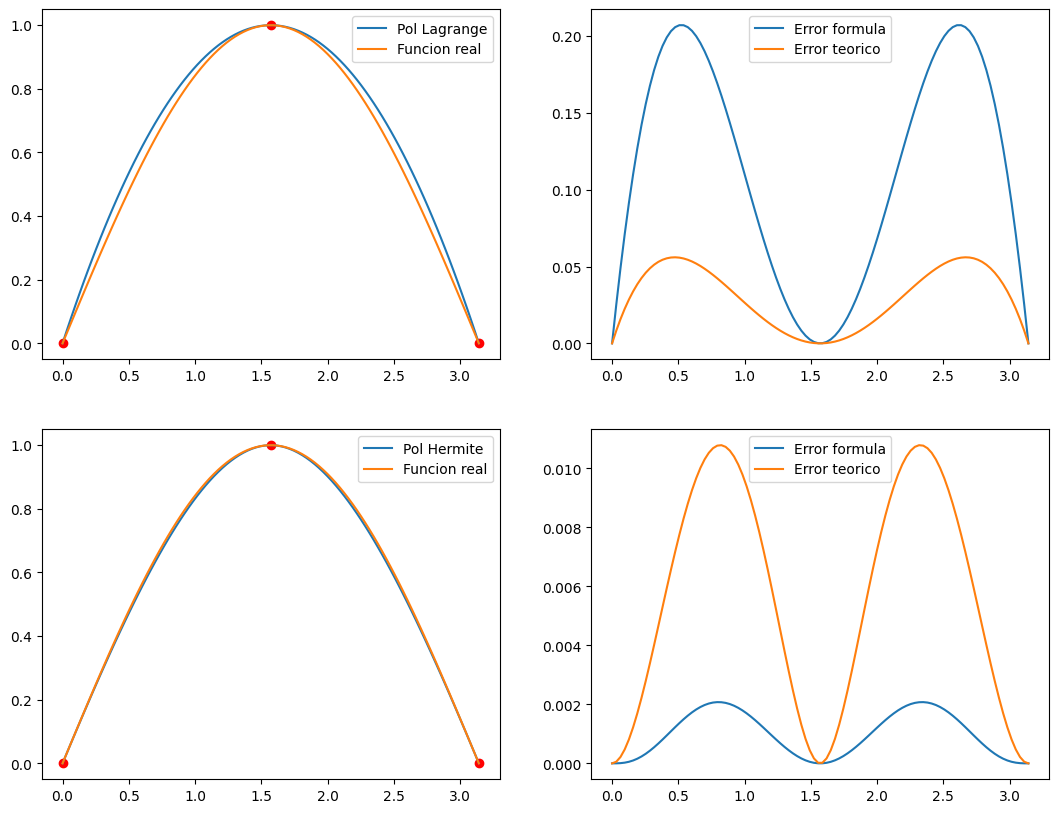

In [ ]:
# Interpolacion de lagrange y hermite
pol_lagrange = lagrange(x_num, y)
pol_hermite = CHermite(x_num, y, dy)

x_interp = np.linspace(min(x_num), max(x_num), 100)

# Error de lagrange teorico y con la formula
y_error_LF = error_lagrange(x_interp)
y_error_LT = error_teorico(f(x_interp), pol_lagrange(x_interp))

# Error de hermite teorico y con la formula
y_error_HF = error_hermite(x_interp)
y_error_HT = error_teorico(f(x_interp), pol_hermite(x_interp))

# Graficas de comparacion
fig, ax = plt.subplots(2, 2, figsize= (13, 10))

# Lagrange
ax[0, 0].scatter(x_num, y, color= 'Red')
ax[0, 0].plot(x_interp, pol_lagrange(x_interp), label= 'Pol Lagrange')
ax[0, 0].plot(x_interp, f(x_interp), label= 'Funcion real')
ax[0, 0].legend()

ax[0, 1].plot(x_interp, y_error_LF, label= 'Error formula')
ax[0, 1].plot(x_interp, y_error_LT, label= 'Error teorico')
ax[0, 1].legend()

# Hermite
ax[1, 0].scatter(x_num, y, color= 'Red')
ax[1, 0].plot(x_interp, pol_hermite(x_interp), label= 'Pol Hermite')
ax[1, 0].plot(x_interp, f(x_interp), label= 'Funcion real')
ax[1, 0].legend()

ax[1, 1].plot(x_interp, y_error_HF, label= 'Error formula')
ax[1, 1].plot(x_interp, y_error_HT, label= 'Error teorico')
ax[1, 1].legend()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
# Fincion para el polinomio de newton

def dif_Div(xList, yList, j, i= 0):
    if i == j:
        return yList[i]
    else:
        return (dif_Div(xList, yList, j, i=i+1) - dif_Div(xList, yList, j-1, i=i))/(xList[j] - xList[i])

def coef_newton(xList, yList):

    coef = np.zeros_like(xList, dtype=float)

    for j in range(len(xList)):
        coef[j] = dif_Div(xList, yList, j)

    return coef

def inter_Newton(xList, yList, x):
    a = coef_newton(xList, yList)
    P = a[0]

    producto = 1
    for j in range(1, len(xList)):

        producto *= (x - xList[j-1])
        P += a[j]*producto

    return P

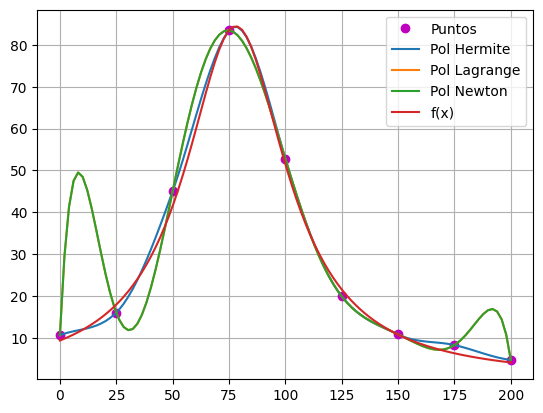

In [ ]:
# Constantes con las que se trabajara
E_r = 78
Gamma = 55

# Datos experimentales
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# Calculo de la constante sigma_0, se puede despejar este valor de la ecuacion dada
# y reemplazar cualuier parde datos experimentales (E , sigma)=(75 , 83.5)

sigma_0 = 83.5 * ((75 - E_r)**2 + (Gamma/2)**2)

# Formula de Breit-Wigner
f = lambda E : sigma_0 / ((E - E_r)**2 + (Gamma/2)**2)
# Derivada
df = lambda E : -2 * sigma_0 * (E - E_r) / ((E - E_r)**2 + (Gamma/2)**2)**2
# Derivada evaluada en los datos dados de energia
dy = df(Energia)


# Polinomio de interpolacion de lagrange
pol_lagrange = lagrange(Energia , sigma_exp)


# Polinomio de Hermite
pol_hermite = CubicHermiteSpline(Energia , sigma_exp , dy)


# Interpolar
x_interp = np.linspace(min(Energia) , max(Energia) , 100)

# Polinomio de Newton
pol_Newton = inter_Newton(Energia, sigma_exp, x_interp)

# Grafico
plt.plot(Energia , sigma_exp , 'mo' , label= 'Puntos')
plt.plot(x_interp , pol_hermite(x_interp), label = 'Pol Hermite')
plt.plot(x_interp , pol_lagrange(x_interp), label = 'Pol Lagrange')
plt.plot(x_interp , pol_Newton , label = 'Pol Newton')
plt.plot(x_interp , f(x_interp) , label= 'f(x)')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# Curvas de error: |Pn(x) - f(x)| y encontrar el error max

def Error(f , Pn , x_interp):
    error = abs(Pn(x_interp) - f(x_interp))
    return max(error)

# Error
error_lagrange = Error(f , pol_lagrange, x_interp)
error_hermite = Error(f , pol_hermite, x_interp)

print(f'Maximo error del polinomio de lagrange {error_lagrange}')
print(f'Maximo error del polinomio de hermite {error_hermite}')

Maximo error del polinomio de lagrange 38.1971822718305
Maximo error del polinomio de hermite 3.5891730161472424


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

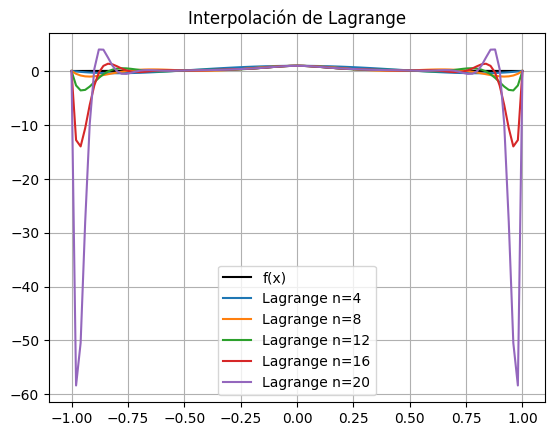

In [ ]:
f = lambda x: 1 / (1 + 25*x**2)

n_vals = [4, 8, 12, 16, 20]
x_interp = np.linspace(-1, 1, 100)
plt.plot(x_interp, f(x_interp), label='f(x)', color='black')

# Inciso 1: Graficos para cada valor de n

for n in n_vals:
  # Calculando los datos
  x = np.linspace(-1, 1, n + 1)
  y = f(x)
  Pn = lagrange(x, y)
  plt.plot(x_interp, Pn(x_interp), label=f'Lagrange n={n}')

plt.legend()
plt.grid(True)
plt.title("Interpolación de Lagrange")
plt.show()

In [ ]:
# Inciso 2: Cota del error para n = 4 en x = 0.5

x = sp.Symbol('x')
f_simbol = 1 / (1 + 25 * x**2)

# Derivada quinta
f5 = sp.diff(f_simbol, x, 5)
f5_simplificada = sp.simplify(f5)

# Evaluar en algún punto cercano a 0.5
f5_eval = abs(f5_simplificada.subs(x, 0.5))

# Valores para n = 4
x_vals = np.linspace(-1, 1, 5)
producto = np.prod([0.5 - xi for xi in x_vals]) # Se calcula el producto (0.5 - x0)...(0.5 - xn)

# Error estimado
error = f5_eval * producto / factorial(5)

print(f'Error = {error}')

Error = 0


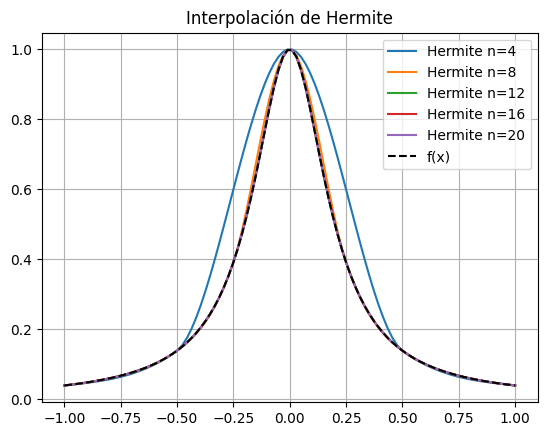

In [ ]:
# Inciso 3

df = lambda x: -50*x / (1 + 25*x**2)**2

for n in n_vals:
  x = np.linspace(-1, 1, n + 1)
  y = f(x)
  dy = df(x)
  hermite = CubicHermiteSpline(x, y, dy)
  plt.plot(x_interp, hermite(x_interp), label=f'Hermite n={n}')

plt.plot(x_interp, f(x_interp), 'k--', label='f(x)')
plt.legend()
plt.grid(True)
plt.title("Interpolación de Hermite")
plt.show()

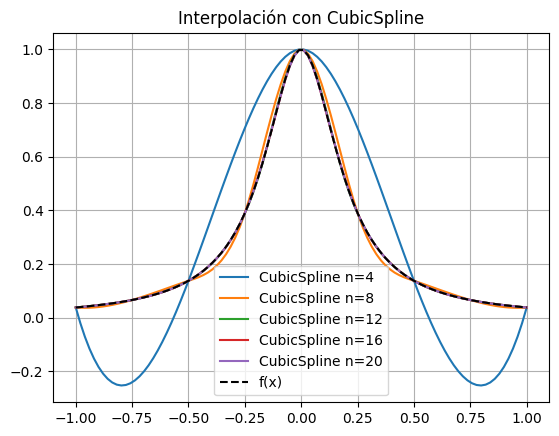

In [ ]:
# Inciso 4

for n in n_vals:
  x = np.linspace(-1, 1, n + 1)
  y = f(x)
  spline = CubicSpline(x, y)
  plt.plot(x_interp, spline(x_interp), label=f'CubicSpline n={n}')

plt.plot(x_interp, f(x_interp), 'k--', label='f(x)')
plt.legend()
plt.grid(True)
plt.title("Interpolación con CubicSpline")
plt.show()

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

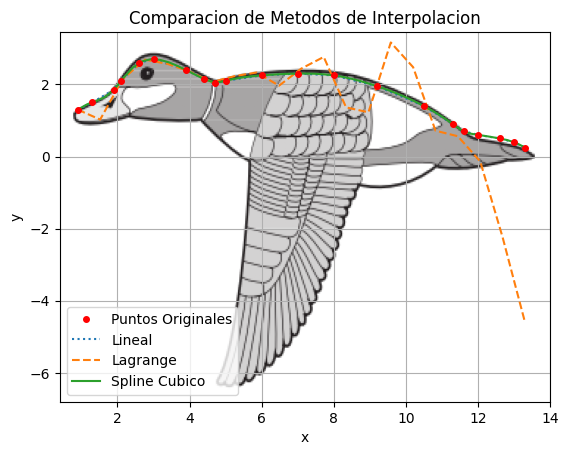

In [7]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representación del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Conjunto de puntos x para graficar las interpolaciones
x_interp = np.linspace(min(xp), max(xp),50)
x_interp_lagrange = np.linspace(min(xp), max(xp),21)

# Interpolacion Lineal
interpolacion_lineal = interp1d(xp, yp)

# Polinomio de interpolacion de Lagrange
pol_lagrange = lagrange(xp, yp)

# Interpolacion mediante splines cubicos
spline_cubico = CubicSpline(xp, yp)

# Grafica
plt.title('Comparacion de Metodos de Interpolacion')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45), alpha=0.3)
plt.plot(xp, yp, '.r', markersize=8, label='Puntos Originales', zorder=5)

# Se grafican todas las curvas juntas
plt.plot(x_interp, interpolacion_lineal(x_interp), label='Lineal', linestyle=':')
plt.plot(x_interp_lagrange, pol_lagrange(x_interp_lagrange) , label='Lagrange', linestyle='--')
plt.plot(x_interp, spline_cubico(x_interp) , label='Spline Cubico')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Inciso 5:**

Como se observa, el polinomio de Lagrange puede producir oscilaciones importantes, debido al grado del polinomio, en cambio, los splines cúbicos proporcionan una curva más suave y estable

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [9]:
# Datos iniciales
x = np.array([-1, 0, 1, 2], dtype=float)
y = np.array([5, 3, 3, 4], dtype=float)

# Anchos de los intervalos y diferencias de 'y'
h = np.diff(x)
dy = np.diff(y)

# Sistema Matricial:

# Matriz tridiagonal A
A = np.diag(2 * (h[:-1] + h[1:])) + np.diag(h[1:-1], k=1) + np.diag(h[1:-1], k=-1)

# Vector b
b = 6 * np.diff(dy / h)

# Resuelvemos Am = b y se anaden los ceros de los extremos
m_interiores = np.linalg.solve(A, b)
m = np.concatenate(([0], m_interiores, [0]))

# Coeficientes del spline
a = y[:-1]
c = m[:-1] / 2
d = np.diff(m) / (6 * h)
b = (dy / h) - (h / 6) * (2 * m[:-1] + m[1:])

# En x=1.5 , como 1.5 esta en el ultimo intervalo (indice 2), usamos los ultimos coeficientes
x_eval = 1.5
i = 2 # Indice del intervalo [1, 2]
dx = x_eval - x[i]
valor_manual = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3

# Verificacion
spline_scipy = CubicSpline(x, y, bc_type='natural')
valor_scipy = spline_scipy(x_eval)

print(f'Punto a evaluar: x = {x_eval}')
print(f'Resultado calculado: {valor_manual:.4f})
print(f'Resultado usando scipy: {valor_scipy:.4f}")

Punto a evaluar: x = 1.5
Resultado calculado: 3.4500
Resultado usando scipy: 3.4500
